<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>

#  Indice de tipo de Cambio real en chile (TCR) entre 1986 a 2024 como serie de tiempo #

<br>
<br>

* * *
Nombre del alumno: Maximiliano Aguayo Villanueva

Docente: Daniel Nuño <br>
Fecha: 4 de septiembre 2024 <br>

* * *

<br>
<br>

## Índice

- Introducción, objetivo y definición del problema
- Preparación de datos
  - Importar
  - Formato correcto (pandas series, fecha, valores numéricos)
  - Datos de entrenamiento y prueba
- Análisis Exploratorio
  - Visualizaciones
  - Características y estadísticas
  - Descomposición
- Modelo Seasonal Naive
  - Estimación
  - Evaluación

## Introducción, objetivo y definición del problema

## Descripción del TCR
El Tipo de Cambio Real (TCR) es una herramienta económica fundamental para medir la competitividad de los precios de los productos de un país en el mercado internacional. En el caso de Chile, el TCR se utiliza para comparar su posición competitiva frente a sus principales socios comerciales. Este indicador se calcula mediante una fórmula que combina varios elementos económicos clave.

El primer componente es el tipo de cambio nominal, que representa cuánto vale la moneda de un país en términos de otra. Por ejemplo, cuántos pesos chilenos se necesitan para adquirir un dólar estadounidense. El segundo elemento es el índice de precios externos, que refleja cómo evolucionan los precios en los países con los que Chile mantiene relaciones comerciales. Por último, se considera el Índice de Precios al Consumidor (IPC) de Chile, que mide los cambios en los precios de bienes y servicios dentro del país.

La fórmula del TCR combina estos elementos de la siguiente manera: se multiplica el tipo de cambio nominal por el índice de precios externos y luego se divide por el IPC de Chile. El resultado de este cálculo nos da una imagen clara de la posición competitiva de Chile en el mercado global.

### Define que pronosticar

Se analizara el indice del TCR a travez del tiempo para ver la estabilidad economica internacional de chile

### Por que es importante analizar y pronosticar en el contexto social

La importancia del TCR radica en su capacidad para proporcionar información valiosa sobre la competitividad de Chile en el comercio internacional. Este indicador es crucial para la toma de decisiones en política económica y resulta especialmente útil para las empresas que operan en mercados internacionales.

En esencia, el TCR funciona como un barómetro económico que mide la relación entre los precios de los productos chilenos y los de sus socios comerciales, teniendo en cuenta no solo las fluctuaciones en los tipos de cambio, sino también las diferencias en la inflación entre países. Esta medida integral permite a los economistas, políticos y empresarios tener una visión más completa y precisa de la posición competitiva de Chile en el escenario económico globa

## Datos

El banco central de chile registra el TCR como un tipo de cambio en chile 

Los datos de Banxico pueden ser descargados en el siguiente [enlace](https://si3.bcentral.cl/siete/ES/Siete/Cuadro/CAP_TIPO_CAMBIO/MN_TIPO_CAMBIO4/TCB_531_IND_TCRYCOMP)

### Importar

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
data = pd.read_excel("Cuadro_26082024212825.xlsx")


### Formato Correcto

In [5]:
data['Periodo'] = pd.to_datetime(data['Periodo'])
data.index = pd.to_datetime(data['Periodo'])
del data['Periodo']
data

,tipo de cambio
Periodo,
1986-01-01,98.654055
1986-02-01,100.677397
1986-03-01,100.384063
1986-04-01,98.556310
1986-05-01,98.416315
...,...
2024-03-01,109.871042
2024-04-01,108.125447
2024-05-01,103.310015


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.index

DatetimeIndex(['1986-01-01', '1986-02-01', '1986-03-01', '1986-04-01',
               '1986-05-01', '1986-06-01', '1986-07-01', '1986-08-01',
               '1986-09-01', '1986-10-01',
               ...
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01'],
              dtype='datetime64[ns]', name='Periodo', length=463, freq=None)

In [8]:
data.head()

,tipo de cambio
Periodo,
1986-01-01,98.654055
1986-02-01,100.677397
1986-03-01,100.384063
1986-04-01,98.556310
1986-05-01,98.416315


### Entrenamiento y prueba

Dependiendo de la cantidad de datos y la periodicidad podrías definir diferente cantidad de observaciones. La regla de pulgar es usar 80% de los datos para entrenar y el restante 20% para validar los resultados.

Para esta serie de tiempo 6 meses de validación son suficientes.

In [51]:

training_mask = data.index > '2024-01-01'
test = data[training_mask]
train = data[~training_mask]

## Análisis Exploratorio

### Visualizaciones

C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Tipo de cambio real chileno 1986 - 2024')

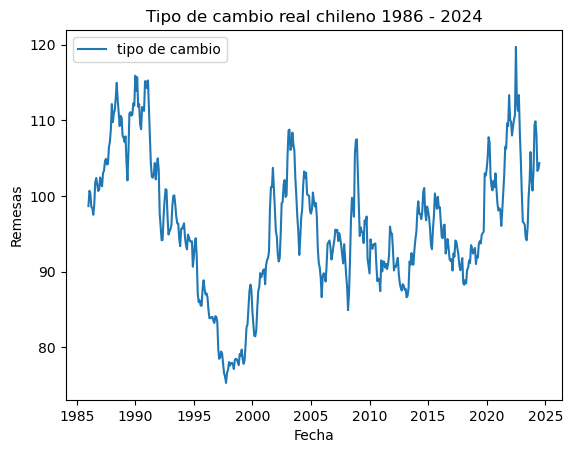

In [9]:
sns.lineplot(data = data)
plt.ylabel("Remesas")
plt.xlabel("Fecha")
plt.title("Tipo de cambio real chileno 1986 - 2024")

array([[<Axes: title={'center': 'tipo de cambio'}>]], dtype=object)

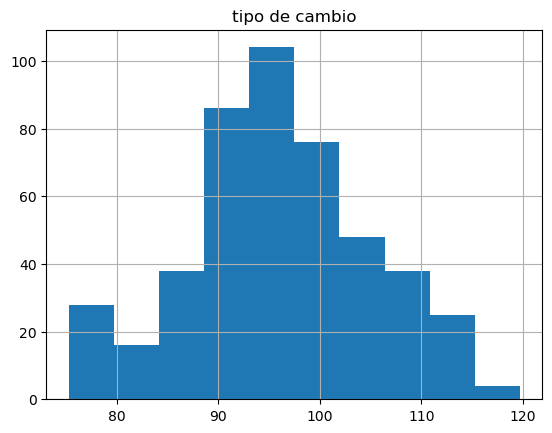

In [59]:

data.hist()

<Axes: ylabel='Density'>

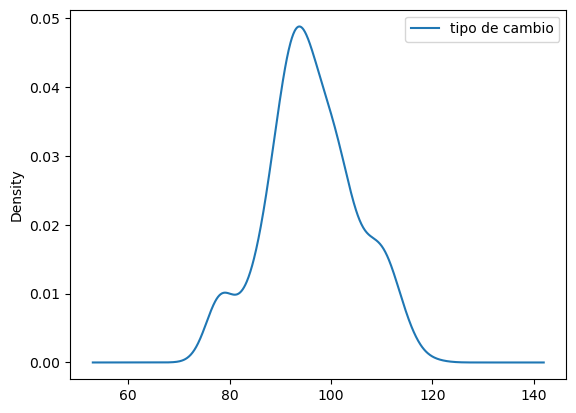

In [60]:

data.plot.density()

(<Figure size 640x480 with 1 Axes>,
 array([0.45501574, 0.33254611, 0.16014395, 0.23987854, 0.10818713,
        0.27991453, 0.5042735 , 0.5037112 , 0.5111336 , 0.34469186,
        0.20186685, 0.0919928 , 0.08040936, 0.15013495, 0.26551957,
        0.45591543, 0.49887539, 0.33468286, 0.46693657, 0.42633828,
        0.44804318, 0.51563203, 0.39394962, 0.49865047, 0.41351777,
        0.43848403, 0.36144849, 0.37269456, 0.50843455, 0.52406658,
        0.49673864, 0.45805218, 0.40069726, 0.49224022, 0.39496176,
        0.36740891, 0.17577598, 0.48144399, 0.17892488]),
 array([29, 21,  8, 28,  6,  7, 16, 23, 30, 33, 37, 18, 31, 15,  0, 20, 25,
        19, 24, 32, 34, 22, 27, 35, 26,  9, 17,  1,  5, 14,  3, 10, 38, 36,
         2, 13,  4, 11, 12], dtype=int64),
 array([ 1,  2,  3,  4,  5,  9, 10, 11, 12, 13, 14, 17, 22, 27, 34, 35, 36,
        38]))

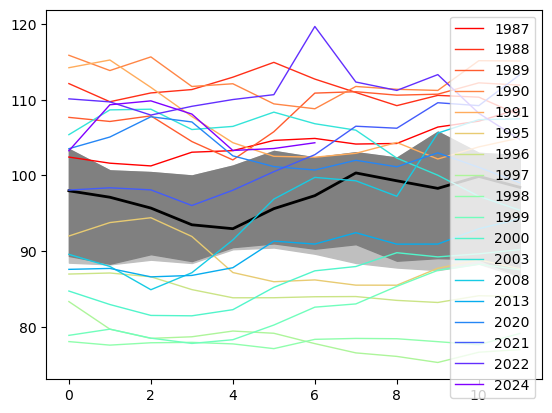

In [62]:
import statsmodels.api as sm
sm.graphics.fboxplot(data=piv, labels=piv.index)

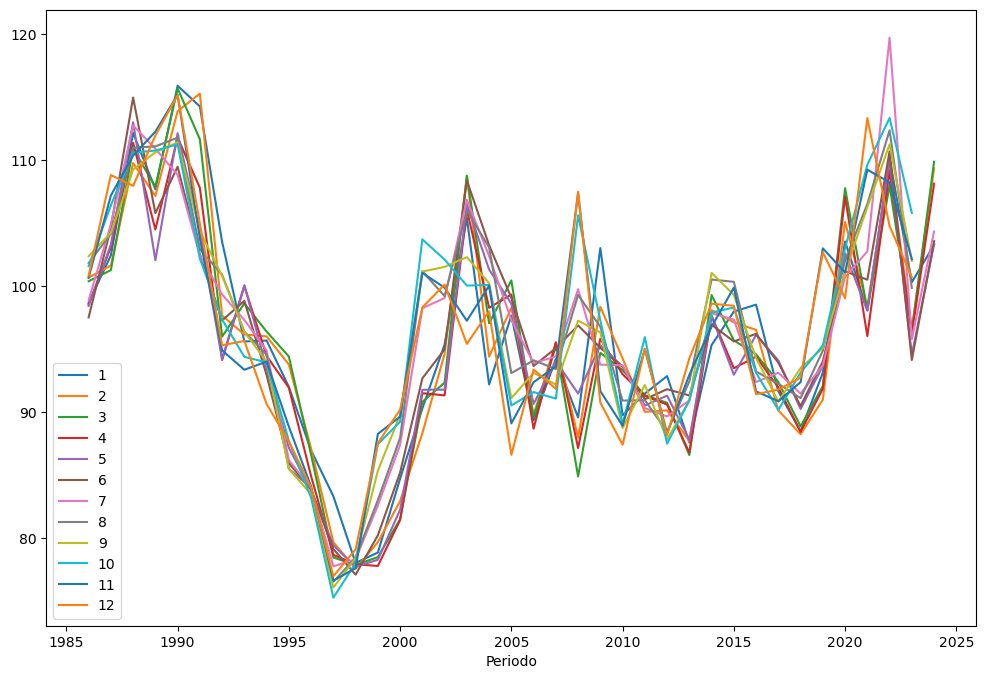

In [10]:
piv_index = getattr(data.index, 'year')
piv_season = getattr(data.index, 'month')

piv = pd.pivot_table(data, index=piv_index, columns=piv_season, values=data)
piv.plot(figsize=(12,8))
plt.legend(pd.unique(piv_season))

### Descomposición

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Periodo
1986-01-01   NaN
1986-02-01   NaN
1986-03-01   NaN
1986-04-01   NaN
1986-05-01   NaN
              ..
2024-03-01   NaN
2024-04-01   NaN
2024-05-01   NaN
2024-06-01   NaN
2024-07-01   NaN
Name: trend, Length: 463, dtype: float64
Periodo
1986-01-01    0.065444
1986-02-01   -0.442136
1986-03-01   -0.505070
1986-04-01   -1.142496
1986-05-01   -1.026106
                ...   
2024-03-01   -0.505070
2024-04-01   -1.142496
2024-05-01   -1.026106
2024-06-01   -0.149574
2024-07-01    0.458584
Name: seasonal, Length: 463, dtype: float64
Periodo
1986-01-01   NaN
1986-02-01   NaN
1986-03-01   NaN
1986-04-01   NaN
1986-05-01   NaN
              ..
2024-03-01   NaN
2024-04-01   NaN
2024-05-01   NaN
2024-06-01   NaN
2024-07-01   NaN
Name: resid, Length: 463, dtype: float64
Periodo
1986-01-01     98.654055
1986-02-01    100.677397
1986-03-01    100.384063
1986-04-01     98.556310
1986-05-01     98.416315
                 ...    
2024-03-01    109.871042
2024-04-01    108.125447
2024-05-01    1

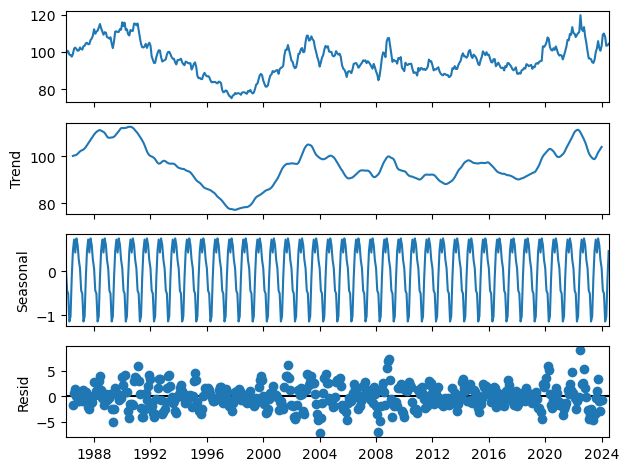

In [38]:
from matplotlib import pyplot
result = seasonal_decompose(data, model='additive')
result.plot()
pyplot.show()

### Características y estadísticas

In [39]:
data.describe()

,tipo de cambio
count,463.000000
mean,96.060959
std,8.827458
min,75.265231
25%,90.846773
50%,95.316856
75%,101.725345
max,119.711693


In [40]:
data.skew()

tipo de cambio    0.023896
dtype: float64

In [41]:
data.kurtosis()

tipo de cambio   -0.230371
dtype: float64

In [42]:
data.median()

tipo de cambio    95.316856
dtype: float64

## Modelo Seasonal Naive + Drift

Con lo visto con anterioridad en el análisis exploratorio, es posible que el modelo Seasonal Naive sea un lo suficientemente bueno para la serie de tiempo analizada.

El modelo toma el valor estacional indediatamente anterior cómo el siguiente valor.

\begin{gather*}
\hat{y}_{T+h|T}=y_{T+h-m(k+1)}
\end{gather*}

La razón es que es una serie con un componente altamente estacional. También muestra una tendencia, por lo tanto es recomendabe usar un modelo que tóme en consideración la


### Estimación

In [58]:
# HistoricAverage's usage example:
from statsforecast.models import HistoricAverage

# Create an array with the observed values in Bricks:
y_mean = data.values

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y=y_mean)
y_hat_dict = model.predict(h=5)

y_hat_dict

{'mean': array([96.06096, 96.06096, 96.06096], dtype=float32)}

In [74]:
pd.to_datetime(['2024-08-01', '2024-09-01', '2024-10-01','2024-11-01','2024-12-01'])
# Specify the quarters predicted:
months_pred = pd.to_datetime(['2024-08-01', '2024-09-01', '2024-10-01','2024-11-01','2024-12-01'])

# Create a dataframe with the quarters and values predicted:
Y_pred_df = pd.DataFrame({'mean_forecast':y_hat_dict["mean"]}, index = months_pred)# Specify the quarters predicted:
months_pred = pd.to_datetime(['2024-08-01', '2024-09-01', '2024-10-01','2024-11-01','2024-12-01'])

# Create a dataframe with the quarters and values predicted:
Y_pred_df = pd.DataFrame({'mean_forecast':y_hat_dict["mean"]}, index = months_pred)

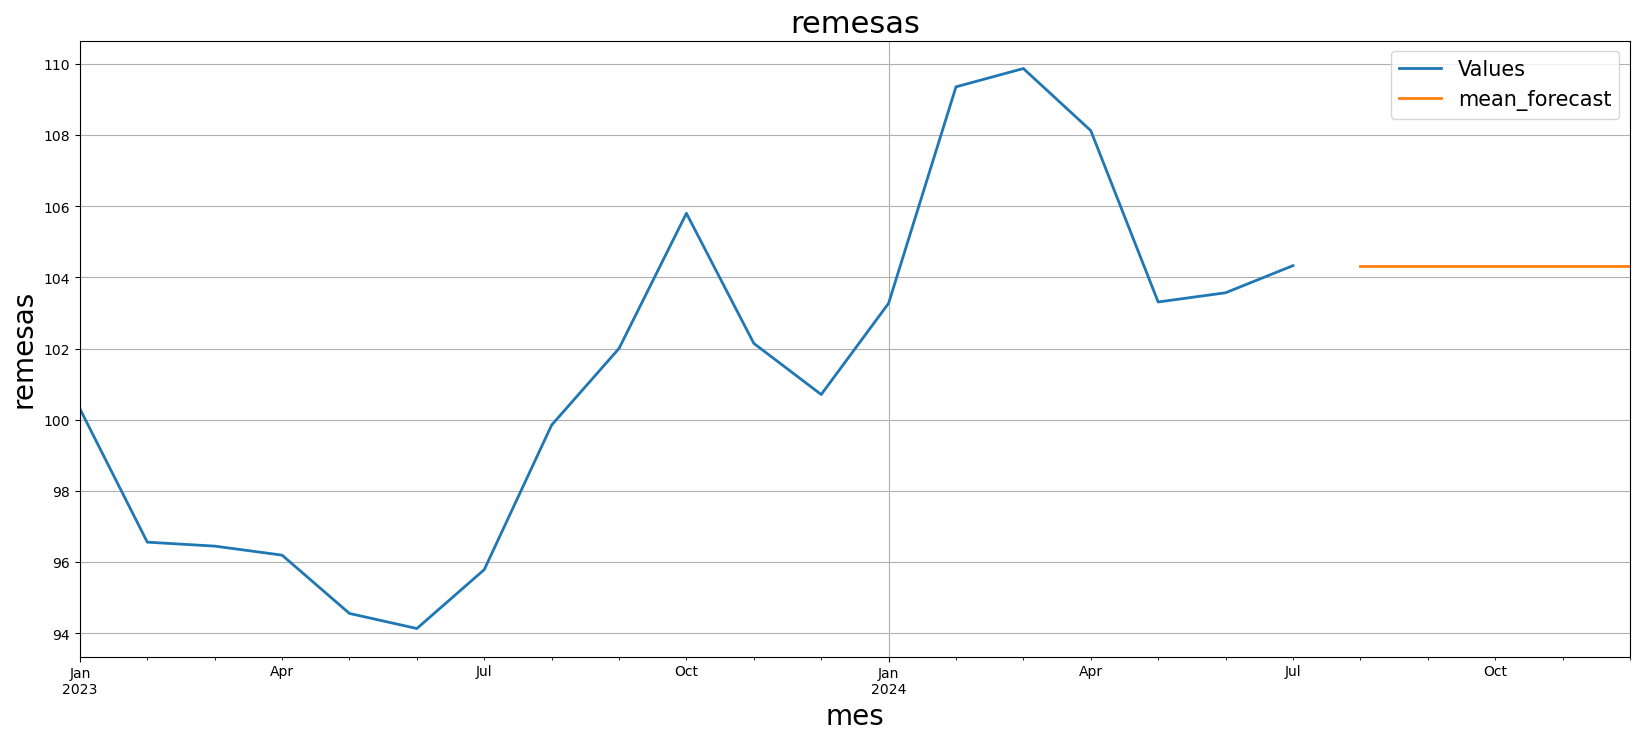

In [75]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('remesas', fontsize=22)
ax.set_ylabel('remesas', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [76]:
data.values.reshape(-1,).shape
# Naive's usage example:
from statsforecast.models import Naive

# Define the model, fit and predict:

model = Naive()
model = model.fit(y=data.values.reshape(-1, ))
y_hat_dict = model.predict(h=5)

y_hat_dict


{'mean': array([104.33115, 104.33115, 104.33115, 104.33115, 104.33115],
       dtype=float32)}

In [77]:
# Create a column with the values predicted:
Y_pred_df["naive_forecast"] = y_hat_dict["mean"]
Y_pred_df

,mean_forecast,naive_forecast
2024-08-01,104.331146,104.331146
2024-09-01,104.331146,104.331146
2024-10-01,104.331146,104.331146
2024-11-01,104.331146,104.331146
2024-12-01,104.331146,104.331146


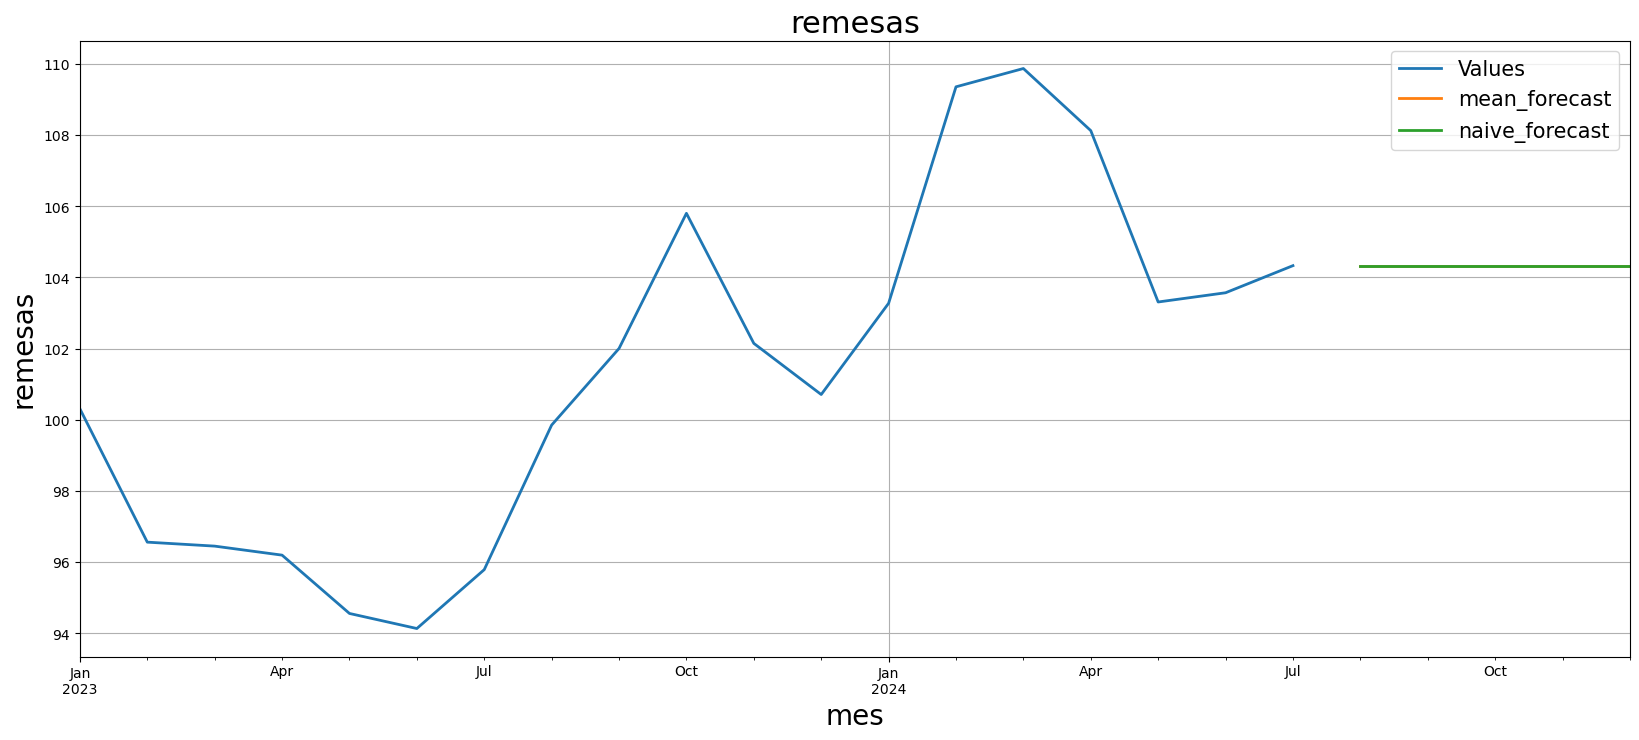

In [78]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('remesas', fontsize=22)
ax.set_ylabel('remesas', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [79]:
# SeasonalNaive's usage example:
from statsforecast.models import SeasonalNaive

# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=data.values.reshape(-1,))
y_hat_dict = model.predict(h=5)

y_hat_dict

{'mean': array([ 99.851   , 102.0039  , 105.80191 , 102.146935, 100.70945 ],
       dtype=float32)}

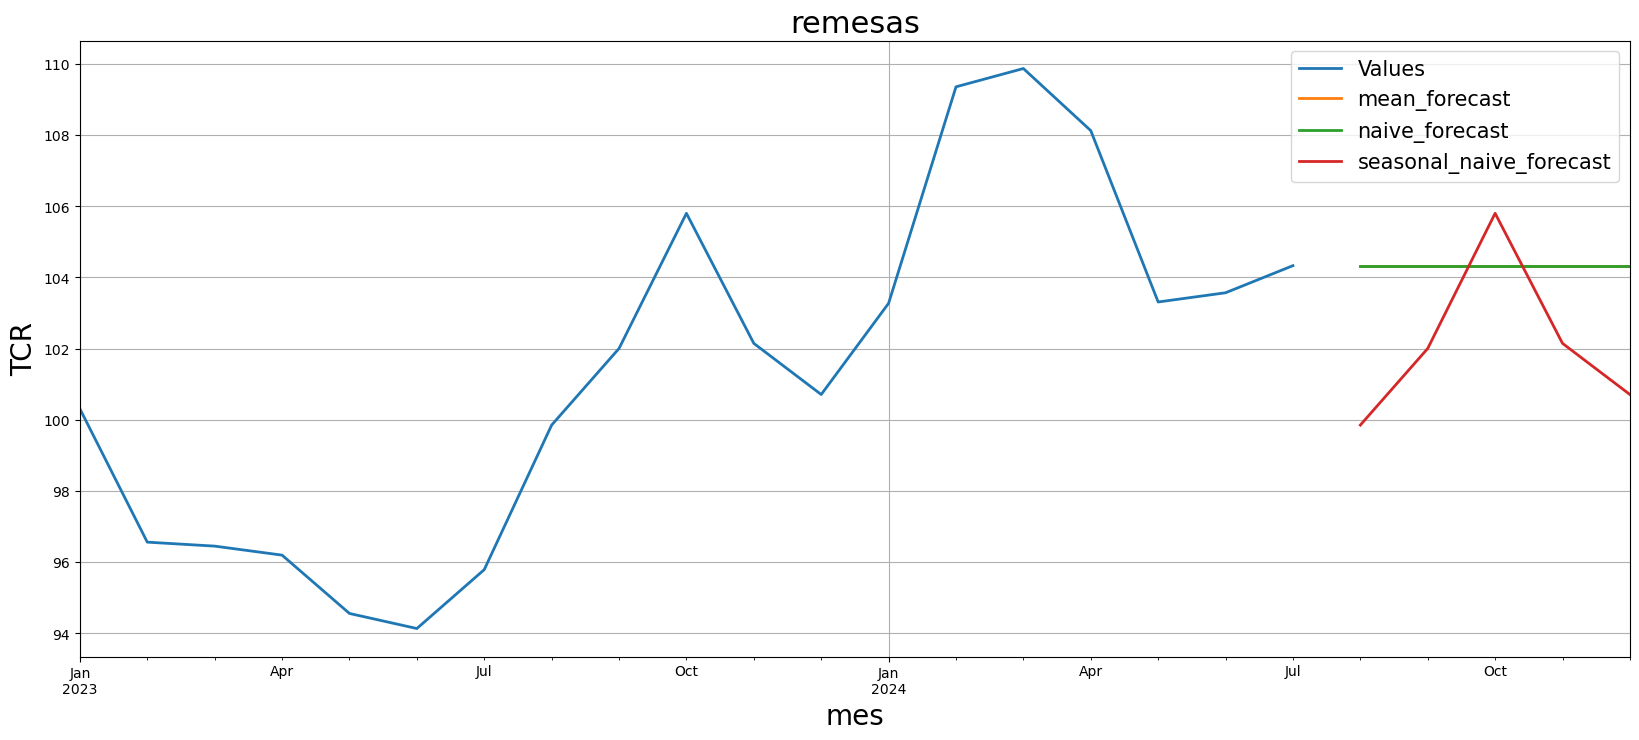

In [80]:
# Create a column with the values predicted:
Y_pred_df["seasonal_naive_forecast"] = y_hat_dict["mean"]

fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('remesas', fontsize=22)
ax.set_ylabel('TCR', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [68]:
Y_pred_df

,mean_forecast,naive_forecast,seasonal_naive_forecast
2024-08-01,96.060959,104.331146,99.850998
2024-09-01,96.060959,104.331146,102.003899
2024-10-01,96.060959,104.331146,105.801910


In [69]:
y_hat_dict["mean"]

array([ 99.851  , 102.0039 , 105.80191], dtype=float32)

### Evaluación

## Bibliografía

